In [1]:
%pylab inline
import numpy as np
import scipy as sc
import scipy.ndimage as ndi
import pylab as pl
import matplotlib as mpl
from IPython import display
from itertools import islice
rc("image", cmap="gray")
import dlinputs as dli
import dlmodels as dlm
import dltrainers as dlt

Populating the interactive namespace from numpy and matplotlib


# Trainers

Trainers allow quick and simple training of models. Unlike other deep learning frameworks, trainers are just temporary scaffolds for training a model; that is, they are wrapped around a model, used for training, and then discarded, leaving only the trained model.

In addition, trainers do not invert control; that is, you write a standard stochastic gradient descent training loop. This is not only less mysterious than burying the loop inside some framework, it also gives a great deal more flexibility in terms of training logic.

Trainers also provide convenient logic for dynamic displays inside iPython notbooks (`trainer.display_loss()`).

In [2]:
with dlm.specops:
    template = (Cbr(64) | Mp(2))**2 | Flat() | Fbr(100) | Fl(10)
model = template.create(17, 1, 28, 28)
model

Input: (17L, 1L, 28L, 28L) None
Seq (
  (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU ()
  (3): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (6): ReLU ()
  (7): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (8): Viewer (-1, 3136)
  (9): Linear (3136 -> 100)
  (10): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
  (11): ReLU ()
  (12): Linear (100 -> 10)
)
Output: (17L, 10L) None

In [3]:
import dltrainers as dlt
trainer = dlt.ImageClassifierTrainer(model)
trainer.set_lr(1e-2)

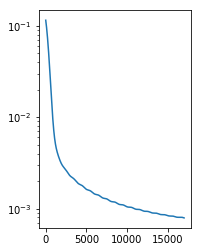

In [4]:
data = (dli.itsqlite("testdata/sample.db", epochs=5000) |
        dli.itmap(image=dli.pilgray, cls=int) |
        dli.itbatch(17) |
        dli.itslice(0, 1000))
for sample in data:
    inputs = expand_dims(sample["image"], 3)
    classes = sample["cls"]
    outputs, loss = trainer.train_batch(inputs, classes)
    # print outputs.size(), loss
    trainer.display_loss()
clf()